#Model Notebook

This is the notebook for model in voice gender detector.Here,we will extract the data , train it and fit in into our model,and will evaluate our results and optimize the model for better results.

In [2]:
#step 1 Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import os
import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

In [4]:
#Step 2:- Data Gathering

In [5]:
df = pd.read_csv("balanced-all.csv")
df

,filename,gender
0,data/cv-other-train/sample-069205.npy,female
1,data/cv-valid-train/sample-063134.npy,female
2,data/cv-other-train/sample-080873.npy,female
3,data/cv-other-train/sample-105595.npy,female
4,data/cv-valid-train/sample-144613.npy,female
...,...,...
66933,data/cv-valid-train/sample-171098.npy,male
66934,data/cv-other-train/sample-022864.npy,male
66935,data/cv-valid-train/sample-080933.npy,male
66936,data/cv-other-train/sample-012026.npy,male


In [6]:
#Step 3:- EDA

In [7]:
df.head()

,filename,gender
0,data/cv-other-train/sample-069205.npy,female
1,data/cv-valid-train/sample-063134.npy,female
2,data/cv-other-train/sample-080873.npy,female
3,data/cv-other-train/sample-105595.npy,female
4,data/cv-valid-train/sample-144613.npy,female


In [8]:
df.tail()

,filename,gender
66933,data/cv-valid-train/sample-171098.npy,male
66934,data/cv-other-train/sample-022864.npy,male
66935,data/cv-valid-train/sample-080933.npy,male
66936,data/cv-other-train/sample-012026.npy,male
66937,data/cv-other-train/sample-013841.npy,male


In [9]:
df.isnull().sum()

filename    0
gender      0
dtype: int64

In [10]:
#Step 4:-Plotting samples

In [12]:
df['gender'].value_counts()

gender
female    33469
male      33469
Name: count, dtype: int64

In [13]:
# get total male samples
male_samples = len(df[df['gender'] == 'male'])
print(male_samples)

33469


In [14]:
# get total female samples
female_samples = len(df[df['gender'] == 'female'])
print(female_samples)

33469


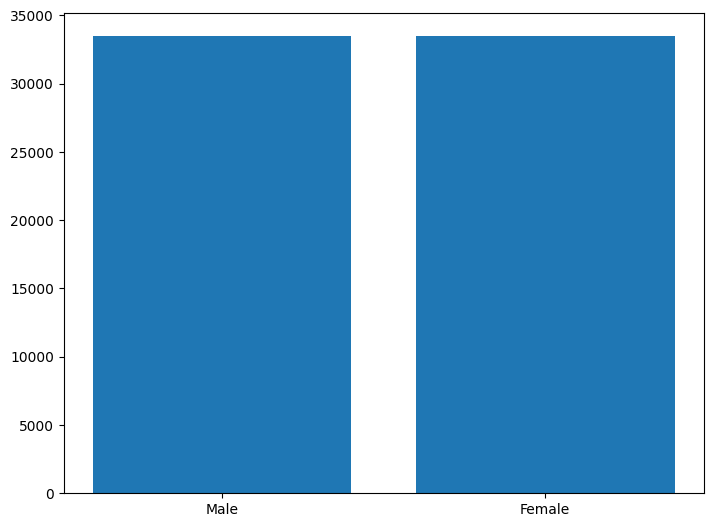

In [16]:
from matplotlib import pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[33469,33469]
ax.bar(gender,values)
plt.show()

In [17]:
#Step 5:- Labelling For Male and Female

In [18]:
label={"male":1,"female":0}
print(label)

{'male': 1, 'female': 0}


In [19]:
#Step 6:- Defining Function
#It will save that bundled array in results folder, which will save us time in the second run.

In [20]:
def load_data(vector_length=128):
    """A function to load gender recognition dataset from `data` folder."""
    results_folder = "results"
    features_file = os.path.join(results_folder, "features.npy")
    labels_file = os.path.join(results_folder, "labels.npy")

    # Make sure results folder exists
    if not os.path.isdir(results_folder):
        os.mkdir(results_folder)

    # If features & labels already loaded individually and bundled, load them from there instead
    if os.path.isfile(features_file) and os.path.isfile(labels_file):
        return np.load(features_file), np.load(labels_file)

    # Read dataframe
    df = pd.read_csv("balanced-all.csv")

    # Initialize arrays for audio features and labels
    x = np.zeros((len(df), vector_length))
    y = np.zeros((len(df), 1))

    for i, (filename, gender) in tqdm.tqdm(enumerate(zip(df['filename'], df['gender'])), "Loading data", total=len(df)):
        features = np.load(filename)
        x[i] = features
        y[i] = label2int.get(gender, 0)  # Assuming label2int is a dictionary

    # Save the audio features and labels into files
    np.save(features_file, x)
    np.save(labels_file, y)

    return x, y


In [33]:
#Step 7:-Splitting the Dataset into test and train,valid

In [22]:
def split_data(x, y, test_size=0.1, valid_size=0.1):
    # split training set and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=7)
    # split training set and validation set
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=valid_size, random_state=7)
    # return a dictionary of values
    return {
        "x_train": x_train,
        "x_valid": x_valid,
        "x_test": x_test,
        "y_train": y_train,
        "y_valid": y_valid,
        "y_test": y_test
    }


In [ ]:
#Step 8:-Load Dataset

In [23]:
# load the dataset
x, y = load_data()
# split the data into training, validation and testing sets
data = split_data(x, y, test_size=0.1, valid_size=0.1)

In [34]:
#Step 9:-#Defining the Model
#define model which will be convolutional model
#save file in h5 weight file and use in gui file

In [24]:
def create_model(vector_length=128):
    """5 hidden dense layers from 256 units to 64, not the best model, but not bad."""
    model = Sequential()
    model.add(Dense(256, input_shape=(vector_length,)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.3))
    # one output neuron with sigmoid activation function, 0 means female, 1 means male
    model.add(Dense(1, activation="sigmoid"))
    # using binary crossentropy as it's male/female classification (binary)
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
    # print summary of the model
    model.summary()
    return model

In [25]:
#Step 10:- construct the model
model = create_model()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [29]:
#Step 11:-Traning the Model

In [28]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
# use tensorboard to view metrics
tensorboard = TensorBoard(log_dir="logs")
# define early stopping to stop training after 5 epochs of not improving
early_stopping = EarlyStopping(mode="min", patience=5, restore_best_weights=True)

batch_size = 64
epochs = 100
# train the model using the training set and validating using validation set
model.fit(data["x_train"], data["y_train"], epochs=epochs, batch_size=batch_size, validation_data=(data["x_valid"], data["y_valid"]),
          callbacks=[tensorboard, early_stopping])

Epoch 1/100


848/848 [==============================] - 14s 13ms/step - loss: 0.5570 - accuracy: 0.7593 - val_loss: 0.3783 - val_accuracy: 0.8483
Epoch 2/100
848/848 [==============================] - 9s 11ms/step - loss: 0.4185 - accuracy: 0.8322 - val_loss: 0.3407 - val_accuracy: 0.8641
Epoch 3/100
848/848 [==============================] - 10s 12ms/step - loss: 0.3784 - accuracy: 0.8522 - val_loss: 0.3072 - val_accuracy: 0.8778
Epoch 4/100
848/848 [==============================] - 10s 12ms/step - loss: 0.3628 - accuracy: 0.8604 - val_loss: 0.3011 - val_accuracy: 0.8783
Epoch 5/100
848/848 [==============================] - 9s 11ms/step - loss: 0.3483 - accuracy: 0.8677 - val_loss: 0.2943 - val_accuracy: 0.8822
Epoch 6/100
848/848 [==============================] - 9s 11ms/step - loss: 0.3340 - accuracy: 0.8717 - val_loss: 0.2990 - val_accuracy: 0.8808
Epoch 7/100
848/848 [==============================] - 10s 11ms/step - loss: 0.3298 - accuracy: 0.8728 - val_loss: 0.2862 - val_acc

In [30]:
#Step 12:-Save the Model

In [32]:
# save the model to a file
model.save("results/model.h5")